## Sample output/analysis from mixture model posterior

In [23]:
import pandas as pd
import numpy as np

%matplotlib inline
from seaborn import plt
plt.rcParams['figure.figsize'] = (10, 5)

# load in data
trace = pd.read_csv('trace.csv')
N = trace.shape[0]
trace_burnt = trace[2000:N]
trace_burnt = trace_burnt.drop(['Unnamed: 0'], axis = 1)

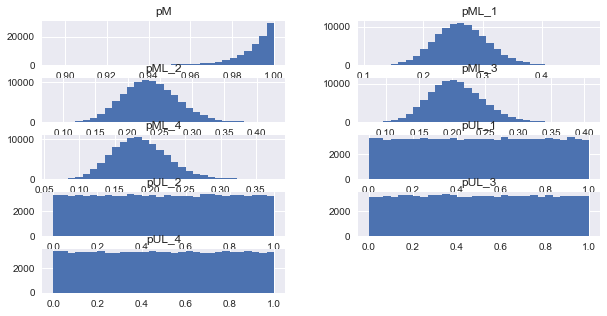

In [24]:
hist_plot = trace_burnt.hist(bins=30,layout=(5,2))

In [ ]:
## can i plot the llh??? 

In [34]:
t = trace_burnt.describe()

In [28]:
Gamma = pd.read_csv('Gamma_nM2_L2.csv')
(pM, pML, pUL) = (0.2, [0.8,0.8], [0.2,0.2])

KeyError: 'std'

### Comments

#### Sampling $I$

This method does not perform well, even when I impose strong priors and set initial parameter values equal to the truth.  

First, the posterior for $p_M$ is heavily skewed toward 1 when I sample $I$ using the formula in Step 1.  This corresponds with high posterior probabilities of $I(a,b)$, which may imply large false positive matching rates if threshold is set too low. 

This issue reflects the fact that updates to $(p_M, p_{M\ell}, p_{U\ell})$ depend on assignments of $I(a,b)$. The $sample_I$ function is too quick to assign matches.  This may result from the fact that I use two clusters, and that once $p_{U\ell}$ probabilities get set low, the chain cannot recover.  I test this issue by adding 1 to the denominator of the Bernoulli parameter in Step 1:

$$p \equiv Pr(\ I(a,b)^{(k+1)}=1\ |\ \gamma(a,b)) = Pr(\ M\  |\  \gamma(a,b)) = \frac{p_M^{(k)}Pr(\ \gamma(a,b)\ |\ M)}{Pr(\gamma(a,b)) + 1} $$ 

This change prevents $p_M$ from converging to 1 <span style="color:blue">(but I need to write more tests) </span>

#### Other bugs

My results are extremely sensitive to a choice of prior! Choosing the prior will be important to explore. 

Could I sample from the joint distribution of $(p_M, p_{M\ell}, p_{U\ell})\ | I$?  Could I model as Dirichlet?

Ultimately it is not worth the time and energy trying to fix this broken method so now I focus on the bipartite matching, which will fix many of these issues.